In [102]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Preprocessing
## Image Processes

In [103]:
main_directory = "Ingredients/"

folders = os.listdir(main_directory)

ingredients = []
labels = []
image_size = (100,100)
channel = 3

for folder in folders:
    folder_path = os.path.join(main_directory, folder)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            if file.lower().endswith((".jpg", ".jpeg", ".png", ".gif")):
                try:
                    image = cv2.imread(file_path)
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    resized_image = cv2.resize(image_rgb, image_size)
                    ingredients.append(resized_image)
                    labels.append(folder)
                except:
                    continue 

In [104]:
ingredients = np.array(ingredients)
ingredients = np.reshape(ingredients, (-1, image_size[0] * image_size[1] * channel))
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np.array(labels)
labels = labels.flatten()

# Basic Model & Prediction

In [105]:
X_train, X_test, y_train, y_test = train_test_split(ingredients, labels, test_size = 0.3)

In [106]:
svm_model = SVC().fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7931034482758621

# Model Tuning

In [9]:
svm = SVC()
svm_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf"]}
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .................................C=1, kernel=linear; total time=   4.0s
[CV] END .................................C=1, kernel=linear; total time=   3.9s
[CV] END .................................C=1, kernel=linear; total time=   4.7s
[CV] END .................................C=1, kernel=linear; total time=   4.3s
[CV] END .................................C=1, kernel=linear; total time=   4.4s
[CV] END ....................................C=1, kernel=rbf; total time=   5.1s
[CV] END ....................................C=1, kernel=rbf; total time=   4.8s
[CV] END ....................................C=1, kernel=rbf; total time=   4.9s
[CV] END ....................................C=1, kernel=rbf; total time=   4.8s
[CV] END ....................................C=1, kernel=rbf; total time=   4.9s
[CV] END .................................C=2, kernel=linear; total time=   4.1s
[CV] END .................................C=2, k

In [10]:
svm_cv_model.best_params_

{'C': 3, 'kernel': 'rbf'}

## Final Model & Prediction

In [107]:
svm_tuned = SVC(C = 3, kernel = "rbf").fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.823088455772114

# Model Reviews

## Model Statistics

In [108]:
print(f'accuracy score = {accuracy_score(y_test, y_pred)}')
print("")
print(f'classification_report =')
print(classification_report(y_test, y_pred))

accuracy score = 0.823088455772114

classification_report =
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        60
           1       0.60      0.70      0.64        69
           2       0.72      0.45      0.55        29
           3       0.73      0.83      0.77        87
           4       1.00      0.85      0.92        39
           5       0.78      0.56      0.65        32
           6       0.75      0.55      0.63        33
           7       0.60      0.69      0.64        55
           8       0.99      1.00      0.99       195
           9       0.97      1.00      0.99        68

    accuracy                           0.82       667
   macro avg       0.79      0.74      0.76       667
weighted avg       0.83      0.82      0.82       667



In [109]:
labels = le.inverse_transform(labels)

## Model Visualization

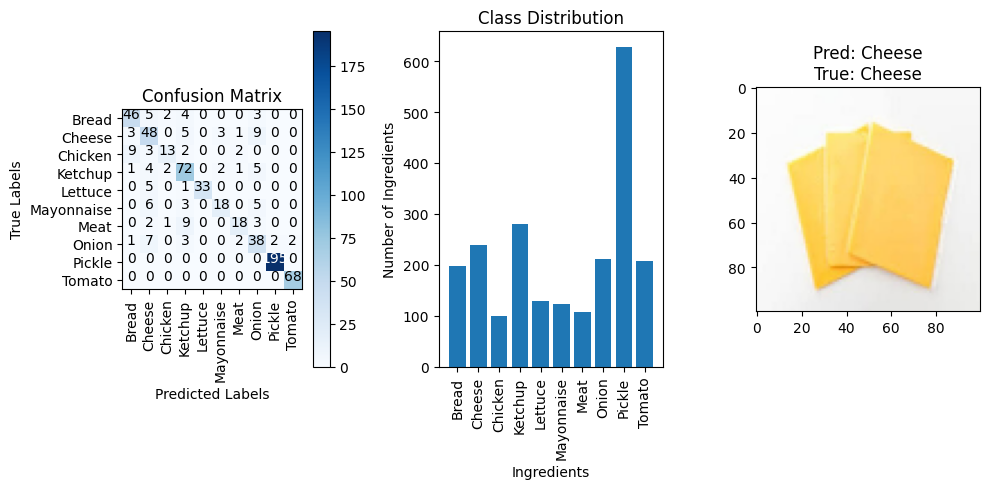

In [114]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(labels)
fig = plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation='vertical')
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

#Class Distrubution
plt.subplot(1,3,2)
unique_classes, class_counts = np.unique(labels, return_counts = True)

plt.bar(unique_classes, class_counts)

plt.xticks(rotation='vertical')
plt.xlabel('Ingredients')
plt.ylabel('Number of Ingredients')
plt.title('Class Distribution')

#Samples
image = random.randint(0, len(X_test))
plt.subplot(1,3,3)
plt.imshow(X_test[image].reshape(image_size[0], image_size[1], channel))
plt.tight_layout()
plt.title(f'Pred: {folders[y_pred[image].astype(int)]}\nTrue: {folders[y_test[image].astype(int)]}')
plt.show()

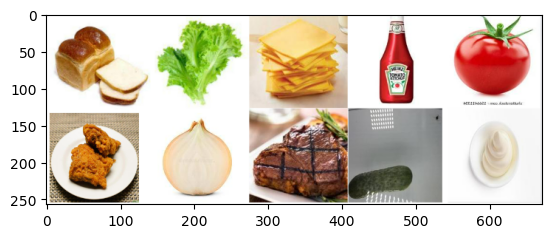

In [116]:
image = cv2.imread("FinalTest.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_final = cv2.resize(image, image_size)
image_final = image_final.reshape(image_size[0], image_size[1], channel)
plt.imshow(image);

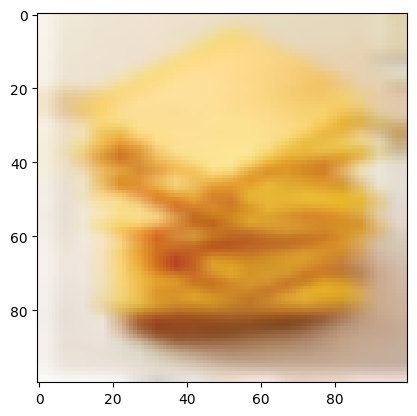

In [132]:
image_height, image_width, _ = image_final.shape
rows = 2
columns = 5
width = image_width // columns
height = image_height // rows
images = []
for i in range(rows):
        for j in range(columns):
            x = j * width + (width / 2)
            y = i * height + (height / 2)
            grid_image = cv2.getRectSubPix(image_final, (width, height), (x, y))
            grid_image = cv2.resize(grid_image, image_size)
            images.append(grid_image)
plt.imshow(images[2]);

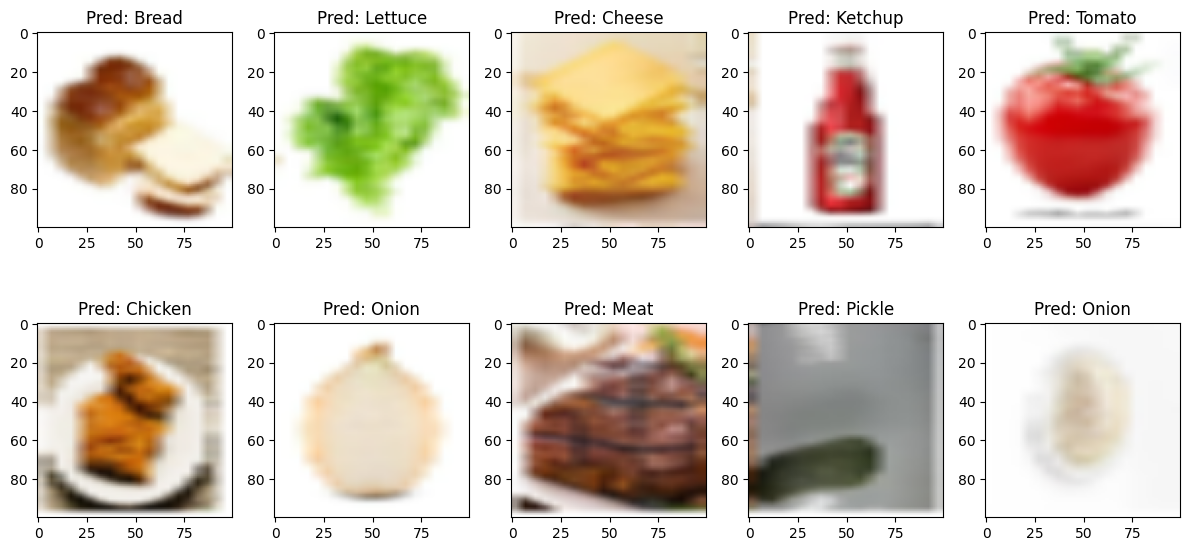

In [135]:
images = np.array(images)
images = np.reshape(images, (-1, image_size[0] * image_size[1] * 3))
predictions = svm_tuned.predict(images)
figure = plt.figure(figsize = (12,6))
for i in range(len(images)):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i].reshape(image_size[0], image_size[1], channel))
    plt.title(f'Pred: {folders[predictions[i].astype(int)]}')
plt.tight_layout()
plt.show()